In [55]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_groq import ChatGroq
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver

In [56]:
class ChatState(TypedDict):
    
    messages: Annotated[list[BaseMessage],add_messages ]

In [57]:
llm= ChatGroq(model = "openai/gpt-oss-120b")

def chat_node(state : ChatState):
    # take user query fom state
    messages = state['messages']
    
    # send to llm
    response = llm.invoke(messages)
    
    # reponse store in state
    return {'messages':[response]}

In [58]:
checkpointer = MemorySaver()


graph = StateGraph(ChatState)

graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile(checkpointer = checkpointer)


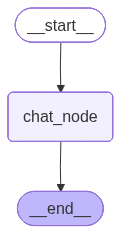

In [59]:
chatbot

In [60]:
thread_id = '1'


while True:
    
    user_message = input('Type here: ')
    
    print("User: ", user_message )
    
    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break
    
    config = {'configurable':{'thread_id':thread_id}}
    
    response = chatbot.invoke({'messages': [HumanMessage(content=user_message)]}, config=config)
    
    print('AI: ', response['messages'][-1].content)

User:  bye


In [61]:
initial_state = {
    'messages': [HumanMessage(content='What is the capital of india')]
}

chatbot.invoke(initial_state)['messages'][-1]

ValueError: Checkpointer requires one or more of the following 'configurable' keys: thread_id, checkpoint_ns, checkpoint_id

In [ ]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hi my name is raunak', additional_kwargs={}, response_metadata={}, id='4bd022c8-0e0a-4845-a627-05bd64322f99'), AIMessage(content='Hi Raunak! 👋 Nice to meet you. How can I help you today?', additional_kwargs={'reasoning_content': 'We need to respond according to system instructions: be helpful, etc. The user says "hi my name is raunak". We can respond greeting, ask how can help. Also maybe ask about preferences. Use friendly tone.'}, response_metadata={'token_usage': {'completion_tokens': 73, 'prompt_tokens': 77, 'total_tokens': 150, 'completion_time': 0.154728497, 'completion_tokens_details': {'reasoning_tokens': 46}, 'prompt_time': 0.00311401, 'prompt_tokens_details': None, 'queue_time': 0.05252251, 'total_time': 0.157842507}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_626f3fc5e0', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c0e42-6ddc-7280